In [1]:
import pandas as pd 
import os 


In [4]:
os.getcwd()
os.chdir('C:/Users/ehdrb/OneDrive/바탕 화면/DA_File')

In [33]:
dtt = pd.read_csv('Kaggle_data/World_happiness_report/World-happiness-report-updated_2024.csv', encoding = 'latin1')

dtt

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


In [25]:
pd.isnull(dtt).sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [43]:
dtt['Country name'].value_counts()

Country name
Argentina     18
Costa Rica    18
Brazil        18
Bolivia       18
Bangladesh    18
              ..
Cuba           1
Maldives       1
Guyana         1
Oman           1
Suriname       1
Name: count, Length: 165, dtype: int64

In [34]:
count = dtt.groupby('Country name').agg(cnt = ('year', 'count')).reset_index()



In [35]:

country = count[count['cnt'] > 9]['Country name']
country_lst = country.values

In [36]:
update_dt = dtt[dtt['Country name'].isin(country_lst)]

update_dt = update_dt.fillna(method = 'ffill')
update_dt.isnull().sum()


C:\Users\ehdrb\AppData\Local\Temp\ipykernel_8756\4154097355.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  update_dt = update_dt.fillna(method = 'ffill')


Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [ ]:
update_dt[update_dt['Country name'].str.contains(r'^t', case=False, na=False, regex=True)]

update_dt['Country name'] = update_dt['Country name'].replace('Türkiye','Turkiye')

In [133]:
update_dt.to_csv(r'Kaggle_data/World_happiness_report/World_happiness_report_update.csv', index = False)

--- Population

In [83]:
pop = pd.read_csv('data/World Bank/Population Estimate/Population-EstimatesCSV.csv', encoding = 'latin1')

In [41]:
pop.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Africa Eastern and Southern,AFE,Age dependency ratio (% of working-age populat...,SP.POP.DPND,88.967697,89.322284,89.685064,90.122475,90.550645,91.013816,...,65.196528,64.427401,63.69044,62.989018,62.323797,61.693253,61.095135,60.527355,59.990174,59.48662


In [84]:
year_lst = pop.iloc[:,4:].columns.tolist()

pop_update = pd.melt(
    pop,
    id_vars=["Country Name","Indicator Name"],  # 'Country Name'은 고정 열로 설정
    value_vars=year_lst,       # 변환할 열들
    var_name="year",           # 변수 이름 열
    value_name="values"        # 값 열
)

In [43]:
pop_update['Indicator Name'].value_counts().index

Index(['Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 00, female', 'Age population, age 00, male',
       'Age population, age 01, female', 'Age population, age 01, male',
       'Age population, age 02, female', 'Age population, age 02, male',
       'Age population, age 03, female',
       ...
       'Probability of dying among children ages 5-9 years (per 1,000)',
       'Probability of dying among youth ages 20-24 years (per 1,000)',
       'Probability of dying at age 5-14 years (per 1,000 children age 5)',
       'Rural population', 'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Sex ratio at birth (male births per female births)',
       'Urban population', 'Urban population (% of total population)',
       'Urban population growth (annual %)'],
      dtype='object', name='Indicator Name', length=189)

In [85]:
pop_update = pop_update.fillna(0)

In [86]:
pop_update = pop_update.pivot_table(index=['Country Name', 'year'], columns='Indicator Name', values='values', aggfunc='first').reset_index()

In [126]:
pop_update.to_csv('data/World Bank/Population Estimate/pop_update.csv')

---- HNP

In [87]:
hnp = pd.read_csv('data/World Bank/HNP/HNP_StatsCSV.csv')

In [132]:
hnp[:1]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,135.793291,136.888217,138.053699,139.371649,140.741498,141.786497,...,106.280004,103.784095,101.266399,99.294429,98.082042,97.189787,95.741339,94.659513,93.379389,NaN


In [88]:
year_lst = hnp.iloc[:,4:].columns.tolist()

hnp_update = pd.melt(
    hnp,
    id_vars=["Country Name","Indicator Name"],  # 'Country Name'은 고정 열로 설정
    value_vars=year_lst,       # 변환할 열들
    var_name="year",           # 변수 이름 열
    value_name="values"        # 값 열
)

In [89]:
hnp_update = hnp_update.fillna(0)

In [90]:
hnp_update = hnp_update.pivot_table(index=['Country Name', 'year'], columns='Indicator Name', values='values', aggfunc='first').reset_index()

In [140]:
hnp_update.to_csv('data/World Bank/HNP/hnp_update.csv')

--Report

In [50]:
report = pd.read_csv('Kaggle_data/World_happiness_report/World_happiness_report_update.csv')

In [51]:
import re
def find_letter(data, letter):
    pattern = f"^{letter}"  # 특정 알파벳으로 시작하는 정규표현식
    lst = [item for item in data if re.match(pattern, item, re.IGNORECASE)]
    return set(lst)

In [52]:
find_letter(report['Country name'], 't')

{'Taiwan',
 'Tajikistan',
 'Tanzania',
 'Thailand',
 'Togo',
 'Tunisia',
 'Turkiye',
 'Turkmenistan'}

In [53]:
report['Country name'] = report['Country name'].replace({'Hong Kong S.A.R. of China' : 'HongKong',
                                                         'Taiwan Province of China' : 'Taiwan'})

In [177]:
report.to_csv('Kaggle_data/World_happiness_report/World_happiness_report_update.csv')

In [54]:
report['year'] = report['year'].astype('object')

In [273]:
report['year'].value_counts()

year
2017    139
2015    136
2016    136
2019    136
2014    135
2023    134
2018    134
2022    133
2012    133
2011    132
2013    131
2021    120
2010    117
2020    114
2009    107
2008    106
2007     98
2006     86
2005     27
Name: count, dtype: int64

In [55]:
sub_report = report[['Country name','year','Life Ladder']]
sub_report['year'].astype('int')

0       2008
1       2009
2       2010
3       2011
4       2012
        ... 
2249    2019
2250    2020
2251    2021
2252    2022
2253    2023
Name: year, Length: 2254, dtype: int64

In [ ]:
hnp_update['year']=hnp_update['year'].astype('int')
pop_update['year']=pop_update['year'].astype('int')

In [58]:
hnp_update = hnp_update[hnp_update['year'] >= 2005]
pop_update = hnp_update[hnp_update['year'] >= 2005]

In [59]:
report = report.rename(columns = {'Country name' : 'Country Name'})

In [60]:
tot_dt = pd.merge(report,hnp_update, on = ['Country Name','year'])
tot_dt = pd.merge(tot_dt, pop_update, on = ['Country Name','year'])

In [62]:
corr_matrix = tot_dt.select_dtypes('number').corr()

# 상관계수가 0.5 이상 또는 -0.5 이하인 값만 필터링
filter_corr = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]
filter_corr = filter_corr.dropna(axis=1, how='all')
filter_corr
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=corr_matrix.isna())


,Unnamed: 0,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Urban population_y,Urban population (% of total population)_y,Urban population growth (annual %)_y,Use of insecticide-treated bed nets (% of under-5 population)_y,Vitamin A supplementation coverage rate (% of children ages 6-59 months)_y,Wanted fertility rate (births per woman)_y,Women who were first married by age 15 (% of women ages 20-24)_y,Women who were first married by age 18 (% of women ages 20-24)_y,Women's share of population ages 15+ living with HIV (%)_y,Young people (ages 15-24) newly infected with HIV_y
Unnamed: 0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life Ladder,NaN,1.000000,0.797825,0.732580,0.714082,0.530924,NaN,NaN,0.502306,NaN,...,NaN,0.659662,NaN,NaN,-0.531234,NaN,NaN,NaN,NaN,NaN
Log GDP per capita,NaN,0.797825,1.000000,0.710432,0.833119,NaN,NaN,NaN,NaN,NaN,...,NaN,0.798658,-0.545493,NaN,-0.682842,NaN,NaN,NaN,-0.599689,NaN
Social support,NaN,0.732580,0.710432,1.000000,0.597737,NaN,NaN,NaN,NaN,NaN,...,NaN,0.565247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Healthy life expectancy at birth,NaN,0.714082,0.833119,0.597737,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.674492,-0.543658,NaN,-0.642428,NaN,NaN,NaN,-0.648936,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wanted fertility rate (births per woman)_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.742528,0.812771,NaN,NaN
Women who were first married by age 15 (% of women ages 20-24)_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.742528,1.000000,0.940159,NaN,NaN
Women who were first married by age 18 (% of women ages 20-24)_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.812771,0.940159,1.000000,NaN,NaN
Women's share of population ages 15+ living with HIV (%)_y,NaN,NaN,-0.599689,NaN,-0.648936,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.542578,NaN,NaN,NaN,1.000000,NaN


In [63]:
corr_matrix = tot_dt.select_dtypes('number').corr()

# Life Ladder 컬럼을 기준으로 상관계수 필터링 (0.5 이상 또는 -0.5 이하)
life_ladder_corr = corr_matrix['Life Ladder']

# 0.5 이상 또는 -0.5 이하인 컬럼만 추출
filtered_life_ladder_corr = life_ladder_corr[(life_ladder_corr >= 0.6) | (life_ladder_corr <= -0.6)]

print(filtered_life_ladder_corr)

Life Ladder                                                                           1.000000
Log GDP per capita                                                                    0.797825
Social support                                                                        0.732580
Healthy life expectancy at birth                                                      0.714082
Age dependency ratio, young_x                                                        -0.634159
                                                                                        ...   
Population ages 50-54, male (% of male population)_y                                  0.605755
Prevalence of stunting, height for age (modeled estimate, % of children under 5)_y   -0.643510
Rural population (% of total population)_y                                           -0.681908
Stillbirth rate (per 1,000 total births)_y                                           -0.608406
Urban population (% of total population)_y        

In [64]:
# 1. '_y'로 끝나는 인덱스 제거
filtered_life_ladder_corr = pd.DataFrame(filtered_life_ladder_corr)
filtered_life_ladder_corr = filtered_life_ladder_corr.loc[~filtered_life_ladder_corr.index.str.endswith('_y')]

# 2. '_x'를 빈 문자열로 대체하여 원래 인덱스 값으로 수정
filtered_life_ladder_corr.index = filtered_life_ladder_corr.index.str.replace('_x', '', regex=False)

print(filtered_life_ladder_corr)

                                                    Life Ladder
Life Ladder                                            1.000000
Log GDP per capita                                     0.797825
Social support                                         0.732580
Healthy life expectancy at birth                       0.714082
Age dependency ratio, young                           -0.634159
Current health expenditure per capita (current ...     0.642788
Current health expenditure per capita, PPP (cur...     0.656683
Domestic general government health expenditure ...     0.634868
Domestic general government health expenditure ...     0.654254
GNI per capita, Atlas method (current US$)             0.732373
Mortality rate, adult, female (per 1,000 female...    -0.604307
Mortality rate, adult, male (per 1,000 male adu...    -0.604760
Mortality rate, infant (per 1,000 live births)        -0.631851
Mortality rate, infant, female (per 1,000 live ...    -0.629245
Mortality rate, infant, male (per 1,000 

In [65]:
lst = filtered_life_ladder_corr.index.to_list()

In [66]:
filtered_tot_dt = tot_dt.loc[:, ~tot_dt.columns.str.endswith('_y')]

# 2. '_x' 접미사 제거
filtered_tot_dt.columns = filtered_tot_dt.columns.str.replace('_x', '', regex=False)

print(filtered_tot_dt)

      Unnamed: 0 Country Name  year  Life Ladder  Log GDP per capita  \
0              0  Afghanistan  2008        3.724               7.350   
1              1  Afghanistan  2009        4.402               7.509   
2              2  Afghanistan  2010        4.758               7.614   
3              3  Afghanistan  2011        3.832               7.581   
4              4  Afghanistan  2012        3.783               7.661   
...          ...          ...   ...          ...                 ...   
2003        2249     Zimbabwe  2019        2.694               7.698   
2004        2250     Zimbabwe  2020        3.160               7.596   
2005        2251     Zimbabwe  2021        3.155               7.657   
2006        2252     Zimbabwe  2022        3.296               7.670   
2007        2253     Zimbabwe  2023        3.572               7.679   

      Social support  Healthy life expectancy at birth  \
0              0.451                            50.500   
1              0.55

In [67]:
filtered_tot_dt = filtered_tot_dt[lst]

In [69]:
corr_matrix = filtered_tot_dt.select_dtypes('number').corr()
corr_matrix.loc[['Life Ladder'], :]

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,"Age dependency ratio, young",Current health expenditure per capita (current US$),"Current health expenditure per capita, PPP (current international $)",Domestic general government health expenditure per capita (current US$),"Domestic general government health expenditure per capita, PPP (current international $)","GNI per capita, Atlas method (current US$)",...,"Population ages 00-04, male (% of male population)","Population ages 05-09, female (% of female population)","Population ages 05-09, male (% of male population)","Population ages 10-14, male (% of male population)","Population ages 45-49, male (% of male population)","Population ages 50-54, male (% of male population)","Prevalence of stunting, height for age (modeled estimate, % of children under 5)",Rural population (% of total population),"Stillbirth rate (per 1,000 total births)",Urban population (% of total population)
Life Ladder,1.0,0.797825,0.73258,0.714082,-0.634159,0.642788,0.656683,0.634868,0.654254,0.732373,...,-0.653229,-0.60816,-0.646289,-0.630293,0.616823,0.605755,-0.64351,-0.681908,-0.608406,0.659662


<Axes: >

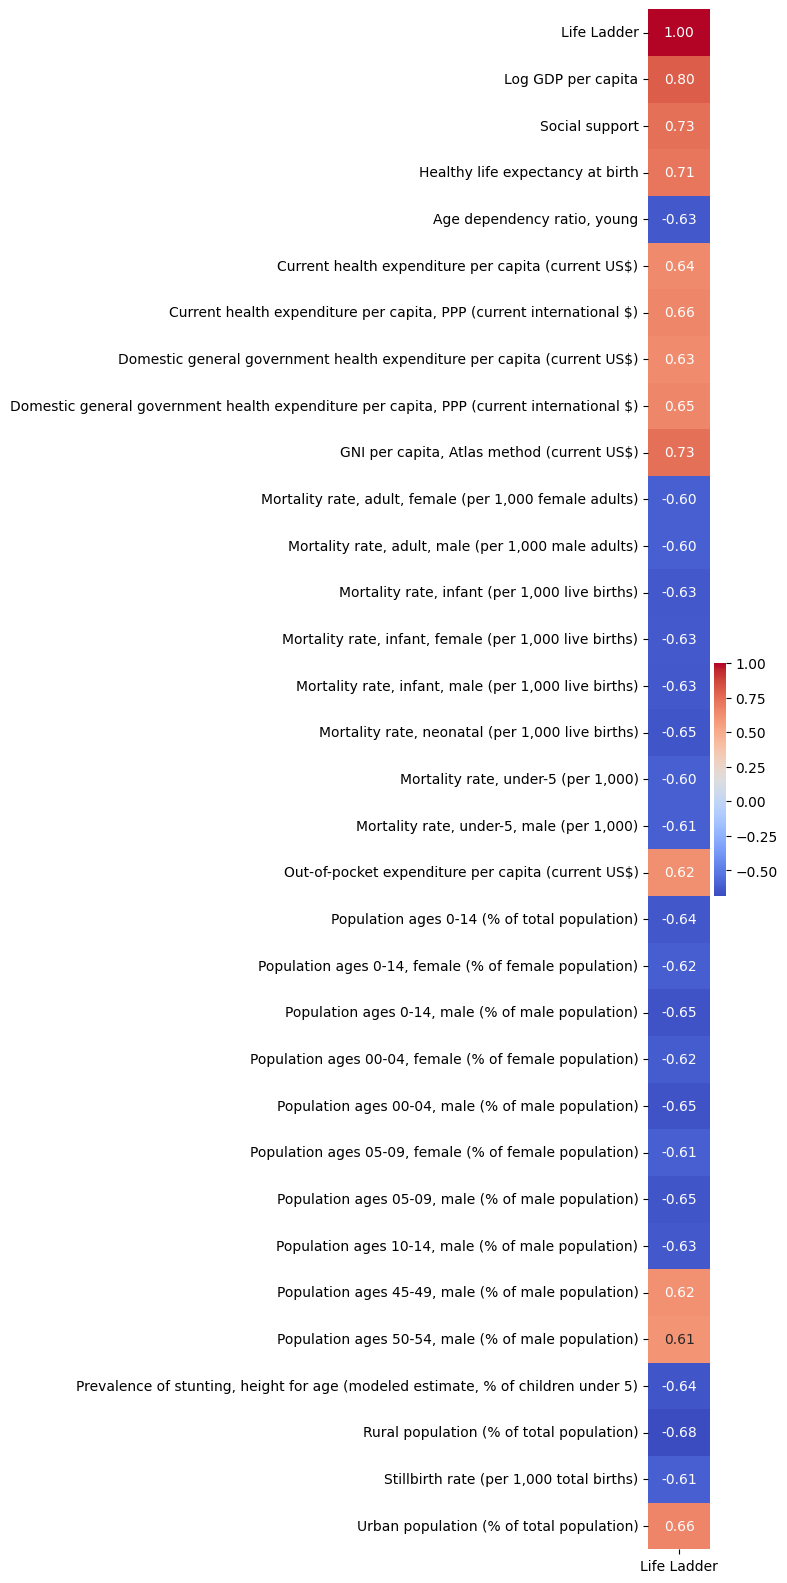

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (1,20))
sns.heatmap(corr_matrix.loc[['Life Ladder'], :].T, annot = True, cmap = 'coolwarm',fmt = '.2f')


In [91]:
filtered_tot_dt[['Country Name','year']] = report[['Country Name','year']]

In [92]:
adj_report = filtered_tot_dt[['Country Name','year','Life Ladder','Log GDP per capita','Social support', 'Healthy life expectancy at birth',
                   'GNI per capita, Atlas method (current US$)','Mortality rate, neonatal (per 1,000 live births)',
                   'Stillbirth rate (per 1,000 total births)','Age dependency ratio, young',
                   'Prevalence of stunting, height for age (modeled estimate, % of children under 5)',
                   'Rural population (% of total population)']]

In [413]:
adj_report.to_csv('Kaggle_data/World_happiness_report/final_report.csv')

In [11]:
rank_report = report[['Country Name','year','Life Ladder']]

In [117]:
rank_update = update_dt[['Country name','year','Life Ladder']]

In [12]:
rank_report = rank_report[rank_report['year'] == 2023]

In [118]:
rank_update = rank_update[rank_update['year'] == 2023]

In [13]:
rank_report["Rank"] = rank_report["Life Ladder"].rank(ascending=False, method="min")
rank_report


,Country Name,year,Life Ladder,Rank
14,Afghanistan,2023,1.446,134.0
30,Albania,2023,5.445,85.0
59,Argentina,2023,6.393,41.0
76,Armenia,2023,5.679,79.0
93,Australia,2023,7.025,9.0
...,...,...,...,...
2186,Venezuela,2023,5.765,75.0
2204,Vietnam,2023,6.325,44.0
2218,Yemen,2023,3.532,129.0
2235,Zambia,2023,3.686,125.0


In [119]:
rank_update['Rank'] = rank_update['Life Ladder'].rank(ascending=False, method = 'min')

In [426]:
rank_report.to_csv('Kaggle_data/World_happiness_report/Rank_report.csv')

In [120]:
rank_update.to_csv('Kaggle_data/World_happiness_report/Rank_update.csv')